# Machine learning classification as a constrained quadratic optimization problem

## Try me
 [![Open In Colab](../../_static/colabs_badge.png)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/NLP/tutorials/Machine_learning_classification_as_a_constrained_quadratic_optimization_problem.ipynb)[![Binder](../../_static/binder_badge.png)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FNLP%2Ftutorials%2FMachine_learning_classification_as_a_constrained_quadratic_optimization_problem.ipynb)

## Problem definition
In this notebook we are to provide a closed form to reduce a machine learning linear classification problem to a constrained quadratic optimization problem.

In this example, let us imagine that we want to predict the status of an engine by reading sensor data. We do not know what is the mathematical expression that models the status of the machine as a function of the sensor data reading, but we have collected data in different conditions, so we have a **dataset** with the data readings that have been generated by sensors measuring the engine in different states: normal operation, and failure state.

In linear classification problems, we find the following definitions: 

- $x^{(t)}$: feature vector of length t of independent variables (e.g in our example this is going to be the different sensor data readings like temperature, rotation speed, torque) x is a vector of length d i.e. $x^{(t)} \in \mathbb{R}^d$, and each element $x_1, x_2, ...$ is going to represent the readings of the different sensors.

- $y^{(t)}$: Label t representation the variable that we want to explain from the feature vector (e.g. in our case, whether the engine is in a failure state or not)

The objective is to learn the parameters of a **maximum margin linear separator** from a training dataset. A maximum margin linear separator is a [hyperplane](https://en.wikipedia.org/wiki/Hyperplane) in the vector space x. Think of an hyperplane as a plane that divides the vector space into two regions. For instance, a line, which is a 1 dimensional plane, divides a 2-dimensional space into two regions, the area above the line and the area below the line. Consider that a hyperplane in the vector space of size $d$ can be represented by a vector of of size $d$. Let us note as $\hat{\theta} \in \mathbb{R}^{d}$ the vector that represents our linear separator. 

To clearly visualize the results, we are going to work with a linear separator of size $d=2$, so that we can visualize the results in a coordinate system. Therefore, we are only going to have data from two sensors, and our data points are noted as:

$x = [x_1, x_2]$

$x_1$: temperature sensor data readings 

$x_2$: Encoder measuring the engine speed in rpms 

## Dataset generation
Now, since we do not really have a dataset, we are going to generate a synthetic one. The following script generates random points and represents them in the bi-dimensional containing all data points.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## This parameter determines (half) the number of samples used
no_samples = 30

## This array represents our temperature readings in failure state
temp_readings_failure = 7*np.random.random_sample((no_samples,1))+29

## This array represents our temperature readings in normal state
temp_readings_normal = 7*np.random.random_sample((no_samples,1))+22

#This array represents our rpms in failure state
rpms_failure = 400*np.random.random_sample((no_samples,1))+2900

#This array represents our rpms in normal state
rpms_normal = 400*np.random.random_sample((no_samples,1))+2500

## Problem representation
Now, let us plot our dataset, together with a hyper-plane which is not necessarily a separator, to illustrate how a line (1-dimensional hyper-plane) divides the 2-dimensional space into two regions:

Text(0, 0.5, '$x_2$ (engine speed in rpms)')

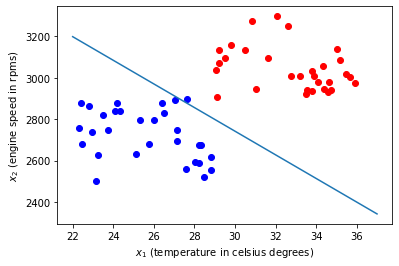

In [ ]:
#Prepare the figure 
fig, ax = plt.subplots()

#Plot the data in failure state in red
ax.scatter(temp_readings_failure, rpms_failure, color='red')
#Plot the data in normal operation in blue
ax.scatter(temp_readings_normal, rpms_normal, color='blue')

# Make a linear space to plot the temperature
t = np.linspace(22,37)

# Initial separator
thetahat_1 =-57
thetahat_0 = 4452

# 
r = thetahat_1*t + thetahat_0
ax.plot(t,r)
plt.xlabel('$x_1$ (temperature in celsius degrees)')
plt.ylabel('$x_2$ (engine speed in rpms)')



### How linear separators work (Support Vector Machines)
The line represents a linear separator with parameters $\hat{\theta} = [57, 1], \hat{\theta}_0 =4452$, that is, all points in the line satisfy the following equation: 

$\hat{\theta}·x + \hat{\theta}_0 = 0$

conform a line (1 dimensional hyperplane) that *clasifies* all points of the 2 dimensional space into two categories. The objective is to configure the parameters of this line so that all data points corresponding to the failure state fall into one category, and that all data points corresponding to the normal operation state fall into the other category. This way, we can use the expression $\hat{\theta}·x + \hat{\theta}_0$ to explain the status of the engine from a reading x:

$\hat{\theta}·x + \hat{\theta}_0 \geq 0 \rightarrow$ the engine is in failure state

$\hat{\theta}·x + \hat{\theta}_0 \leq 0 \rightarrow$ the engine is in normal state

We can use the sign operator to provide a numeric value to the labels that represent both status: 

$h(x) = \text {sign(}  \hat{\theta} \cdot x +  \hat{\theta}_0 \text {)}$

If we read new sensor data and multiply it by the coefficients of our linear separator, we can predict the status of the machine as a failure if the sign is positive (the result is greater than zero) and we can predict the status of the machine as normal state if the result is negative. This type of classifiers are also known as **Support Vector Machines**.

## Learning the parameters of a SVM
### The training dataset
Now, the objective is to learn the parameters of our separator from the dataset, a set of historic readings from which we know the status of the machine. Let a sample t of our data data set be noted as: 

- $x^{(t)} = [x_1^{(t)}, x_2^{(t)}]$ temperature sensor and rpm readings at sample t
- $y^{(t)}$ status at sample t {-1 if machine is in normal state, +1 if machine is in failure state}

We are going to have many data readings, some of them in normal state, and some in failure state, and we are going to use these data to find the parameters of a separator that divides the space into two regions based on the information that we have in the database we have collected. 

Let us note our training data set as:

$S_n = [x^{(t)}, y^{(t)}] \forall t \in [1, ..., n]$

### Reducing the learning problem to an optimization problem
Now, given that we are going to use the sign of the result to determine the status of the machine, every separator must ensure that: 

$\hat{\theta}·x^{(t)} + \hat{\theta}_0 \geq 0 \quad \forall y^{(t)} = 1$

$\hat{\theta}·x^{(t)} + \hat{\theta}_0 \leq 0 \quad \forall y^{(t)} = -1$

There might be many different lines that satisfy these constraints, or there might be actually none, that is, the space might not be separable by a line. If the space can be separated by a line, the objective is to find a hard margin separator. 
Note that it is beneficial to maximise the **margin** of our separator, that is, the distance between the line and the closest points above and below it. Given that there is uncertainty on the information we have collected (for instance, we might not have gathered data in every possible situation), it is better to find a margin that maximises the distance between the distance between the data clusters in the two regions. In fact, this is what a human will solve the problem. 
This is known as the maximum margin SVM, i.e., to find the linear hyperplane with the maximum margin, such that all points are classified correctly. 
Furthermore, the parameters  $\hat\theta$  and  $\hat\theta_0$  of the maximum margin separator satisfy the following constraint: 

$y^{(t)}*(\hat\theta·x^{(t)}+\hat\theta_0) \geq 1 \quad \forall t \in [1,...,n]$ 

For convenience, we have set up the minimum distance to the separator to 1. This yields that the margin of our hyperplane is given by $\frac{2}{\left\|{\hat{\theta}}\right\|}$. 
For instance, in our example, imagine that point $x_A$ is the closest point above the line ($y^A=1$) and point $x_B$ is the closest point below the line($y^B=1$). Let us now define a line that is parallel to the separator and passes through $x^A$:

$\hat\theta·x^A+\hat\theta_0 = 1$

$\hat\theta_0·x^A_0 + \hat\theta_1·x^A_1 +\hat\theta_0 - 1 = 0$

 and another one that is also parallel to the separator and passes through $x^B=-1$: 
 
$-\hat\theta·x^B-\hat\theta_0 = 1$

$\hat\theta_1·x^B_1 + \hat\theta_1·x^B_2 +\hat\theta_0 + 1 = 0$
 
The [distance between both parallel lines](https://en.wikipedia.org/wiki/Distance_between_two_parallel_lines) is noted as $\omega$ and is given by:

$\omega = \frac{|(\hat\theta_0+1)-(\hat\theta_0-1)|}{\sqrt{\hat\theta_1^2 + \hat\theta_2^2}} = \frac{2}{\left\|{\hat{\theta}}\right\|}$  

Therefore, our objective function is to maximise this expression, or equivalently, to minimise $\left\|{\hat{\theta}}\right\|/2$, which is a function of the components of the vector $\hat{\theta}$ and $\hat{\theta}_0$. 


With this, our non-linear problem becomes:

$\min \frac{\sqrt{\hat\theta_1^2 + \hat\theta_2^2}}{2}$

subject to:

$y^{(t)}*(\hat\theta·x^{(t)}+\hat\theta_0) \geq 1 \quad \forall t \in [1,...,n]$ 

Or equivalently

$\min \frac{\sqrt{\hat\theta_1^2 + \hat\theta_2^2}}{2}$

subject to:

$\hat\theta·x^{(t)}+\hat\theta_0 \geq 1 \quad \forall y^{(t)} =1$

$\hat\theta·x^{(t)}+\hat\theta_0 \leq -1 \quad \forall y^{(t)} =-1$

## SVMs in Python
Now, we are going to use two different approaches in Python to find the maximum margin separator for our dataset, using the package for data science [Scipy](https://www.scipy.org/).

### Using non-linear programming
In the first approach we are going to use the package **optimize** for optimization. More specifically, we are going to use the [LinearConstraint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html), the [Bounds](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.Bounds.html) modules, and the [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function. The script below imports the dependencies and packs the features into a matrix.

In [ ]:
from scipy.optimize import LinearConstraint, Bounds, minimize

# Pack the 2 sample arrays into 1 array using np.append
failure_features = np.append(temp_readings_failure, rpms_failure,1)
normal_features =np.append(temp_readings_normal, rpms_normal, 1)


#### Minimize
The ```scipy.optimize.minimize``` function takes the following parameters:

- ```fun```: A callable function that provides the objective function as a function of a one dimensional array, where each element of the array is a decision variable. 

- ```x0```:  An initial guess, or initial values for our decision variables

- ```method```: (Optional) The algorithm used for optimization

- ```constraints```: List or dictionary containing the constraints for the optimization problem. 

Given that our problem has constraints, the function will select the [L-BFGS-M](https://en.wikipedia.org/wiki/Limited-memory_BFGS) algorithm. 

Let us first define the objective function to minimize:

In [ ]:
def objective_func(theta):
  return 1/2*(theta[0]**2 + theta[1]**2)**(1/2)

#### Constraints
Now, for the constraints, we can either introduce linear constraints or non-linear constraints. The linear constraints are instances of ```scipy.optimize.LinearConstraint```. This function has the following parameters:

- ```A```: Matrix defining the coefficients in the left-hand-sides of the constraints
- ```ub```: A vector defining the upper bound of the constraints or a scalar defining the upper bound for all the constraints
- ```lb```: A vector defining the lower bound of the constraints or a scalar defining the lower bound for all the constraints

Note that, playing with the values provided to ```ub``` and ```lb``` it is possible to defines constraints of type less or equal, greater or equal, or equal. 
With this function, the following code snippet defines the set of constraints corresponding to the failure state data set samples

In [ ]:
# The right hand sides are x_1^(t), x_2^(t), 1, so we append 1s to the failure features to obtain all right hand sides:
failure_rhs_coefs = np.append(failure_features,np.array(np.ones((no_samples,1))),1)
# For the label +1, we do not need to make any change to the RHS, the lower bound is 1, i.e. 1 <= x_1(i)*theta_1 + x_2(i)*theta_2 + theta_0 <= inf
failure_linear_constraints = LinearConstraint(failure_rhs_coefs, lb=1, ub=np.inf)

And the following code snippet to define the set of constraints for the normal state condition

In [ ]:
normal_rhs_coefs = np.append(normal_features, np.array(np.ones((no_samples,1))),1)
normal_rhs_coefs = normal_rhs_coefs
# For the label +1, we do not need to make any change to the RHS, the lower bound is 1, i.e. -np.inf <= x_1(i)*theta_1 + x_2(i)*theta_2 + theta_0 <= -1
normal_linear_constraints = LinearConstraint(normal_rhs_coefs, lb=-np.inf, ub=-1)



#### Example
Now, we have everything that we need to build our separator! let us use the initial separator at the beginning of the function as the initial guess:

2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.7663190555426902
            Iterations: 10
            Function evaluations: 51
            Gradient evaluations: 10
     fun: 0.7663190555426902
     jac: array([0.00503157, 0.49997468, 0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 51
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 1.54231359e-02,  1.53256051e+00, -4.45199915e+03])
0.2128583851271692
1.0


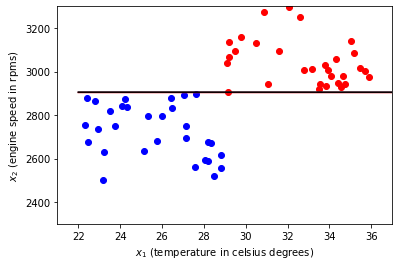

In [ ]:
theta_hat_0 = np.array([57, 1, -4452])
linear_constraint = [failure_linear_constraints, normal_linear_constraints]
print(len(linear_constraint))
# x_0 = [ 1.13792022e+00,  5.42842896e-03, -4.83177976e+01]
res = minimize(objective_func, theta_hat_0, constraints=linear_constraint, 
               options={"maxiter":1000, "disp": True})
print(res)

theta = res.x


#Prepare the figure 
fig, ax = plt.subplots()

#Plot the data in failure state in red
ax.scatter(temp_readings_failure, rpms_failure, color='red')
#Plot the data in normal operation in blue
ax.scatter(temp_readings_normal, rpms_normal, color='blue')

# Make a linear space to plot the temperature
t = np.linspace(22,37)


plt.xlabel('$x_1$ (temperature in celsius degrees)')
plt.ylabel('$x_2$ (engine speed in rpms)')

r_mms = (-theta[0] /theta[1])*t - (theta[2] / theta[1])
ax.plot(t, r_mms)

mod = (abs(theta[0]**2 + theta[1]**2))**-1/2
print(mod)
r_mms_max = (-theta[0] /theta[1])*t + (-theta[2] + 1)/ theta[1]

r_mms_min = (-theta[0] /theta[1])*t + (-theta[2] - 1)/ theta[1]

ax.plot(t, r_mms_min, color='red')
ax.plot(t, r_mms_max, color='black')
ax.set_xlim(21, 37)
ax.set_ylim(2300, 3300)
print(np.min(np.sum(failure_rhs_coefs*theta,axis=1)))

#### Alternative solution: Adding a regulation parameter
Note that the separator might not be the same as a human would have selected when solving this task. This is because the algorithm is quite sensitive to the initial guess passed as argument, and it can converge to a local minimum. To make the algorithm more resilient, we can modify slightly the objective function to factor in $\theta_0$:

In [ ]:
def objective_func(theta):
  return 1/2*(theta[0]**2 + theta[1]**2 + theta[2]**2)**(1/2)

With this regularization, we assume by looking at the data that the separator we are looking for crosses the y axis at a high value, and therefore, we include it in the objective function.
Now, if we try again with this objective function, we get a support vector machine which is closer to the solution that a human would provide:

2
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 26.689281097128372
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8
     fun: 26.689281097128372
     jac: array([ 1.22678280e-02,  5.22136688e-05, -4.99849558e-01])
 message: 'Optimization terminated successfully.'
    nfev: 40
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([ 1.30967158e+00,  5.57996292e-03, -5.33624927e+01])
0.2128583851271692
1.0


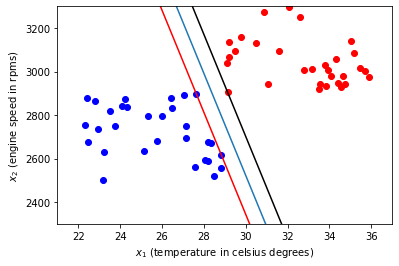

In [ ]:
theta_hat_0 = np.array([57, 1, -4452])
linear_constraint = [failure_linear_constraints, normal_linear_constraints]
print(len(linear_constraint))
# x_0 = [ 1.13792022e+00,  5.42842896e-03, -4.83177976e+01]
res = minimize(objective_func, theta_hat_0, constraints=linear_constraint, 
               options={"maxiter":1000, "disp": True})
print(res)

theta_prime = res.x


#Prepare the figure 
fig, ax = plt.subplots()

#Plot the data in failure state in red
ax.scatter(temp_readings_failure, rpms_failure, color='red')
#Plot the data in normal operation in blue
ax.scatter(temp_readings_normal, rpms_normal, color='blue')

# Make a linear space to plot the temperature
t = np.linspace(22,37)


plt.xlabel('$x_1$ (temperature in celsius degrees)')
plt.ylabel('$x_2$ (engine speed in rpms)')

r_mms = (-theta_prime[0] /theta_prime[1])*t - (theta_prime[2] / theta_prime[1])
ax.plot(t, r_mms)

mod = (abs(theta[0]**2 + theta[1]**2))**-1/2
print(mod)
r_mms_max = (-theta_prime[0] /theta_prime[1])*t + (-theta_prime[2] + 1)/ theta_prime[1]

r_mms_min = (-theta_prime[0] /theta_prime[1])*t + (-theta_prime[2] - 1)/ theta_prime[1]

ax.plot(t, r_mms_min, color='red')
ax.plot(t, r_mms_max, color='black')
ax.set_xlim(21, 37)
ax.set_ylim(2300, 3300)
print(np.min(np.sum(failure_rhs_coefs*theta,axis=1)))

### Using Scipy
#### SVM
Luckly for us, we do not need to worry about in practice because Scipy packs a SVM model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


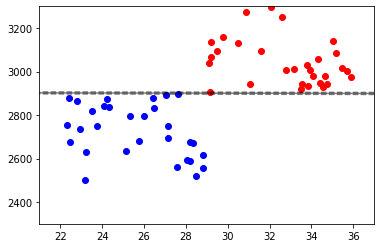

In [ ]:
from matplotlib.axis import YTick
from sklearn import svm

clf_svm = svm.SVC(kernel="linear")
X = np.append(failure_features, normal_features, axis=0)
#y is a vector of ones
y = np.ones((2*no_samples,1))
# make the normal features negative:
y[no_samples:]=-1

clf_svm.fit(X,y)

xx = np.linspace(21, 37, no_samples)
yy = np.linspace(2300, 3300, no_samples)
YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_svm.decision_function(xy).reshape(XX.shape)

#Prepare the figure 
fig, ax = plt.subplots()

#Plot the data in failure state in red
ax.scatter(temp_readings_failure, rpms_failure, color='red')
#Plot the data in normal operation in blue
ax.scatter(temp_readings_normal, rpms_normal, color='blue')

ax.contour( XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

plt.show()

#### Stochastic Gradient Descent
Also, the library implements a Stochastic Gradient Descent model:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


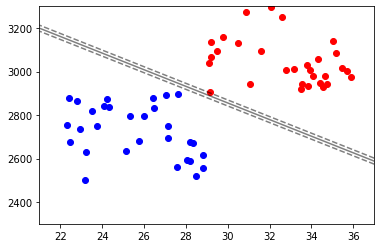

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


X = np.append(failure_features, normal_features, axis=0)
#y is a vector of ones
y = np.ones((2*no_samples,1))
# make the normal features negative:
y[no_samples:]=-1

clf_sgd = make_pipeline(StandardScaler(), SGDClassifier())

clf_sgd.fit(X, y)

xx = np.linspace(21, 37, no_samples)
yy = np.linspace(2300, 3300, no_samples)
YY, XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_sgd.decision_function(xy).reshape(XX.shape)
#Prepare the figure 
fig, ax = plt.subplots()

#Plot the data in failure state in red
ax.scatter(temp_readings_failure, rpms_failure, color='red')
#Plot the data in normal operation in blue
ax.scatter(temp_readings_normal, rpms_normal, color='blue')

ax.contour( XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])

plt.show()

1. Looking at the shapes of the different separators, which one do you think performed best given the training data? Why?

2. Note that the variable ```no_samples``` defined in the first cell defines the number of samples. Increase the value of samples to 3000 and run all the script again to see what happens. What are your main conclusions of this experiment?

Set again the number of samples to 30 to answer the rest of the questions.
3. Note that in the **Using Linear Programming Section**, the variable ```theta``` has the parameters of the first linear separator, and the variable ```theta_prime``` the parameter of the second linear separator. Recall that the margin is defined as $\omega = \frac{|(\hat\theta_0+1)-(\hat\theta_0-1)|}{\sqrt{\hat\theta_1^2 + \hat\theta_2^2}} = \frac{2}{\left\|{\hat{\theta}}\right\|}$º. Calculate the margin of the two linear separators. Which one has the largest margin? Why?

In [ ]:
print("Parameters of NLP estimator:")
print(theta)
print("Parameters of NLP estimator with regularization:")
print(theta_prime)



4. Now, imagine we want to predict the status of the machine for the following points, given as pairs of temperature, rpms  (temperature, rpm): 
- (32, 2600)
- (34, 2600)
- (36, 2600)

Note that to get the results with the two NLP linear separators, you need to calculate if the point is over or below the separators as, as: 

- ```theta[0]*temp + theta[1]*rpm + theta[2] >= 1``` → predict failure

- ```theta[0]*temp + theta[1]*rpm + theta[2] <= -1``` → predict normal state$

Test both linear separators in these provided points. Looking at the data, which one do you think provides more reliable results?

5. Now, to predict values with the Scipy separators, you need to use the method ```predict()``` of the predictor. For instance, the following script uses the SVM predictor to predict the values at 24 degrees and 2200 rpms and 28 degrees and 3300 rpms:

In [ ]:
res = clf_svm.predict([[24, 2200], [28, 3300]])
print(res)

[-1.  1.]


Write down a script to predict the values at the same points as in exercise 4, but using the Scipy models you have trained. What are the main conclusions?